# Image Processing Lab
All  of  the  programming  assignments  are  to  be  done  in  Python  using  additional  libraries  specified  in  the  assignments.  There  aremany  libraries  available,  some  of  which  we  will  be  using,  and  you  are  welcome  to  use  them  with  one  exception:  if  the  library  or  a  function  within  it  performs  the  specific  function  you  are  asked  to  code,  you  may  not  use  that  other  than  perhaps  as  a  reference  to  compare  against. All  of  the  code  you  submit  must  be  your  own. You are welcome to turn in a completed jupyter notebook.

The following code will load an image you can use for this lab. If needed make sure to install PIL using *pip install PIL*.

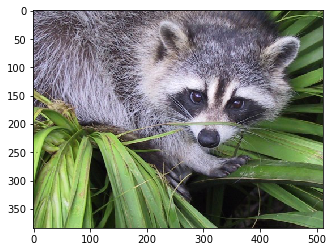

In [1]:
from scipy.ndimage import imread
import matplotlib.pyplot as plt
import numpy as np

def plotImage(image, title=""):
    im = np.array(image, dtype=np.uint8)
    plt.imshow(im, vmin = 0, vmax = 255)
    plt.title(title)
    plt.show()

racoon = imread('racoon.jpg')
racoon = np.array(racoon, dtype=np.int32)
plotImage(racoon)

You can also use this code to convert images to hsb values and back.

In [2]:
def toHSB(image):
    from matplotlib import colors
    temp = 255*colors.rgb_to_hsv(image/255.0)
    return temp.astype(np.int32)
    
def toRGB(image):
    from matplotlib import colors
    temp = 255*colors.hsv_to_rgb(image/255.0)
    return temp.astype(np.int32)

Implement each of the following functions. Provide at least one example of its use.

## Function 1: Convert to grayscale
Takes in a color image and returns a grayscale image using the following formula: Gray = 0.299 Red + 0.587 Green + 0.114 Blue

In [3]:
import numpy as np

def toGrayScale(image):
    red = image[:,:,0]
    green = image[:,:,1]
    blue = image[:,:,2]
    result = 0.299*red + 0.557*green + 0.114*blue
    return result

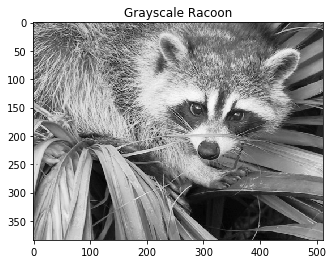

In [4]:
gray_racoon = toGrayScale(racoon)
plt.imshow(gray_racoon,cmap="Greys_r",vmin=0,vmax=255)
plt.title("Grayscale Racoon")
plt.show()

## Function 2: Brightness Adjustment
Takes in a color image and returns the brightened version of that image according to a passed in parameter. Use a max image value of 255.

In [5]:
def brightAdjust(image, c):
    im = toHSB(image)
    im[:,:,2] = np.maximum(np.minimum(im[:,:,2] + c, 255), 0)
    return toRGB(im)


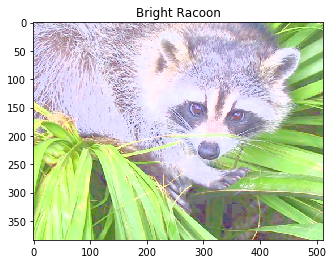

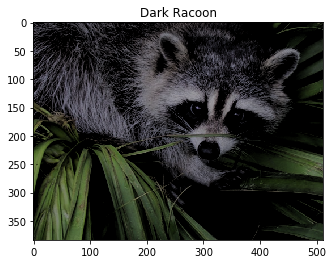

In [6]:
# Test Cases
bright_racoon = brightAdjust(racoon,100)
plotImage(bright_racoon, "Bright Racoon")
dark_racoon = brightAdjust(racoon,-100)
plotImage(dark_racoon, "Dark Racoon")

## Function 3: Contrast Adjustment
Takes in a color image and returns the contrasted version of that image according to a passed in parameter. Use a max image value of 255.

Also, rather than a straight linear operation, we will use a mapping similar to what Photoshop does. In particular, the contrast will be in the range [-100,100] where 0 denotes no change, -100 denotes complete loss of contrast, and 100 denotes maximum enhancement (8x multiplier). If *c* is the contrast parameter, then the level operation applied is:

$$s = \left(\frac{c+100}{100}\right)^4 (r-128) + 128$$

Make sure you work in floating point, not integers. Integer division would not be very acurate.

In [7]:
def contrastAdjust(image, c):
    im = toHSB(image)
    im[:,:,2] = ((c + 100.0)/100.0)**4 * (im[:,:,2] - 128.0) + 128.0
    im[:,:,2] = np.maximum(np.minimum(im[:,:,2],255),0)
    return toRGB(im)



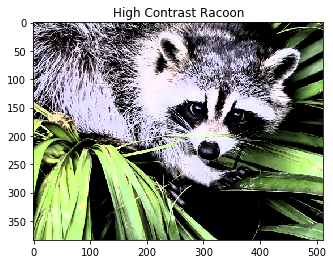

In [8]:
contrast_racoon = contrastAdjust(racoon,30)
plotImage(contrast_racoon, "High Contrast Racoon")

## Function 4: Image Blending
Takes in 2 color images of the same size. Given an alpha value it returns the blended image according to the alpha value. Note that your alpha value can be a single number or a mask image of the same size. The alpha values will be between 0 and 1.

In [9]:
def alphaBlend(im1, im2, alpha = .5):
    result = alpha*im1 + (1-alpha)*im2
    return result

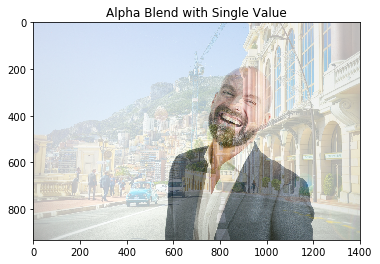

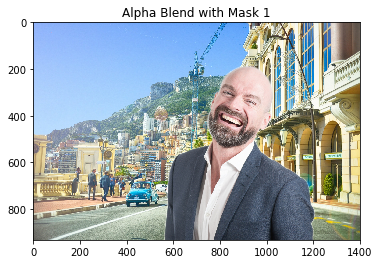

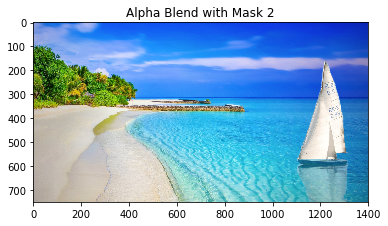

In [10]:
# Test Cases
man = imread("man.jpg")
city = imread("city.jpg")
blended = alphaBlend(man, city, .7)
plotImage(blended, "Alpha Blend with Single Value")

man = imread("man.jpg")
city = imread("city.jpg")
mask1 = imread("alphamask1.jpg")/255.0
blended1 = alphaBlend(man, city, mask1)
plotImage(blended1, "Alpha Blend with Mask 1")

beach = imread("beach.jpg")
boat = imread("boat.jpg")
mask2 = imread("alphamask2.jpg")/255.0
blended2 = alphaBlend(boat, beach, mask2)
plotImage(blended2, "Alpha Blend with Mask 2")

## Function 5: Uniform Blurring
Takes in a grayscale image and returns a corresponding result that has been blurred (spatially filtered) using 3x3 uniform averaging. (Hint: np.sum() may be useful)

In [11]:
def blur(image):
    
    (rows,cols) = image.shape
    
    result = np.zeros((rows,cols))
    
    #Determine the number of edge pixels to exclude
    re = 1
    ce = 1
    
    #Don't include edge cases
    for i in range(re,rows-re): 
        for j in range(ce,cols-ce):
            neighborhood = image[i-re:i+re+1,j-ce:j+ce+1]
            average = np.sum(neighborhood)/9
            result[i,j] = average
    
    return result

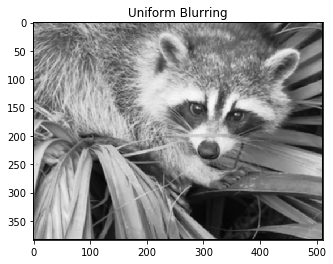

In [12]:
gray_racoon = toGrayScale(racoon)
blur_racoon = blur(gray_racoon)
plt.imshow(blur_racoon,cmap="Greys_r",vmin=0,vmax=255); plt.title("Uniform Blurring")
plt.show()

## Function 6: Median Filter
Takes in a grayscale image and returns a corresponding result that has been median filtered using a 3x3 neighborhood.

In [13]:
def medianFilter(image):
    
    (rows,cols) = image.shape
    
    result = np.zeros((rows,cols))
    
    #Determine the number of edge pixels to exclude
    re = 1
    ce = 1
    
    #Don't include edge cases
    for i in range(re,rows-re): 
        for j in range(ce,cols-ce):
            neighborhood = image[i-re:i+re+1,j-ce:j+ce+1]
            median = np.sort(neighborhood, axis=None)
            result[i,j] = median[4]
    
    return result

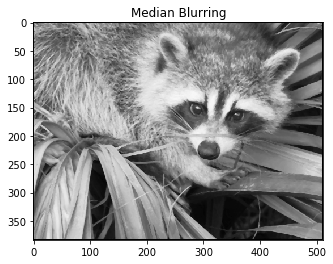

In [14]:
# Test Cases
gray_racoon = toGrayScale(racoon)
median_racoon = medianFilter(gray_racoon)
plt.imshow(median_racoon,cmap="Greys_r",vmin=0,vmax=255); plt.title("Median Blurring")
plt.show()

## Function 7: Sharpening
Takes in a grayscale image and returns a corresponding result that has been sharpened using an unsharp masking kernel that has an A value of 2 (a 6 in the middle and -1 for the four-connected neighbors).

In [15]:
def sharpen(image):
    
    (rows,cols) = image.shape
    
    result = np.zeros((rows,cols))
    
    #Create the sharpen kernal
    ker = np.zeros((3,3))
    ker[1,1] = 6
    ker[0,1] = -1
    ker[1,0] = -1
    ker[2,1] = -1
    ker[1,2] = -1
    
    #Don't include edge cases
    for i in range(1,rows-1): 
        for j in range(1,cols-1):
            neighborhood = image[i-1:i+2,j-1:j+2]
            neighborhood = np.multiply(ker,neighborhood)
            value = np.sum(neighborhood)/2
            result[i,j] = value
    
    return result

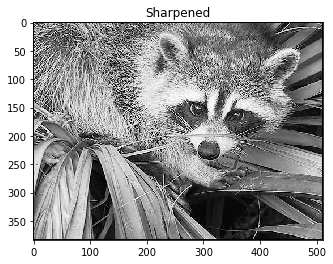

In [16]:
# Test Cases
gray_racoon = toGrayScale(racoon)
sharpen_racoon = sharpen(gray_racoon)
plt.imshow(sharpen_racoon,cmap="Greys_r",vmin=0,vmax=255); plt.title("Sharpened")
plt.show()

## Function 8: Edge Detection
Takes in a grayscale image and returns a corresponding result that shows the gradient magnitude of the input. You may afterward scale the result for visibilty if you wish when you demonstrate the function.

In [17]:
def edgeDetect(image):
    
    (rows,cols) = image.shape
    
    #Create the kernel for x and y direction
    ker_x = np.zeros((3,3))
    ker_x[0,0] = -1
    ker_x[1,0] = -1
    ker_x[2,0] = -1
    ker_x[0,2] = 1
    ker_x[1,2] = 1
    ker_x[2,2] = 1
    
    ker_y = np.zeros((3,3))
    ker_y[0,0] = -1
    ker_y[0,1] = -1
    ker_y[0,2] = -1
    ker_y[2,0] = 1
    ker_y[2,1] = 1
    ker_y[2,2] = 1
    
    result_x = np.zeros((rows,cols))
    result_y = np.zeros((rows,cols))
    
    #One pass for x
    for i in range(1,rows-1): 
        for j in range(1,cols-1):
            neighborhood = image[i-1:i+2,j-1:j+2]
            neighborhood = np.multiply(ker_x,neighborhood)
            value = np.sum(neighborhood)
            result_x[i,j] = value
            
    #One pass for y
    for i in range(1,rows-1): 
        for j in range(1,cols-1):
            neighborhood = image[i-1:i+2,j-1:j+2]
            neighborhood = np.multiply(ker_y,neighborhood)
            value = np.sum(neighborhood)
            result_y[i,j] = value

    #Calculate gradient magnitude
    result = np.sqrt(result_x**2 + result_y**2)
            
    return result


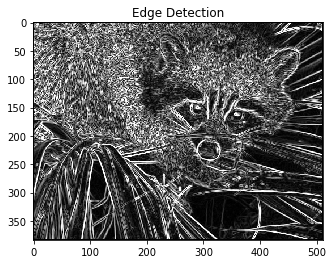

In [18]:
# Test Cases
gray_racoon = toGrayScale(racoon)
edge_racoon = edgeDetect(gray_racoon)
plt.imshow(edge_racoon,cmap="Greys_r",vmin=0,vmax=255); plt.title("Edge Detection")
plt.show()